In [0]:
import pandas as pd

# Curso de Séries Temporais (Time Series) - Alura

##Aula01 - Tendência das vendas

In [4]:
#colocando o arquivo numa variável
alucar = pd.read_csv('/content/alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [5]:
print('Quantidade de Linhas e Colunas:', alucar.shape)

Quantidade de Linhas e Colunas: (24, 2)


In [7]:
#verificar dados nulos
print('Quantidade de Dados nulos: ', alucar.isna().sum().sum()) #o segundo sum junta as colunas

Quantidade de Dados nulos:  0


In [9]:
#verificando os tipos da colunas
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [10]:
#convertendo a coluna mês para o tipo datetime
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [0]:
#instalando o seaborn
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [14]:
print(sns.__version__)

0.10.1


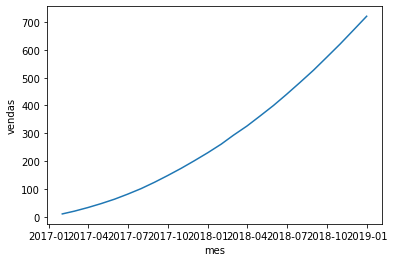

In [16]:
#fazer o primeiro plot
sns.lineplot(x='mes', y='vendas', data = alucar)

fonte para visualização de dados: https://urbaninstitute.github.io/graphics-styleguide/


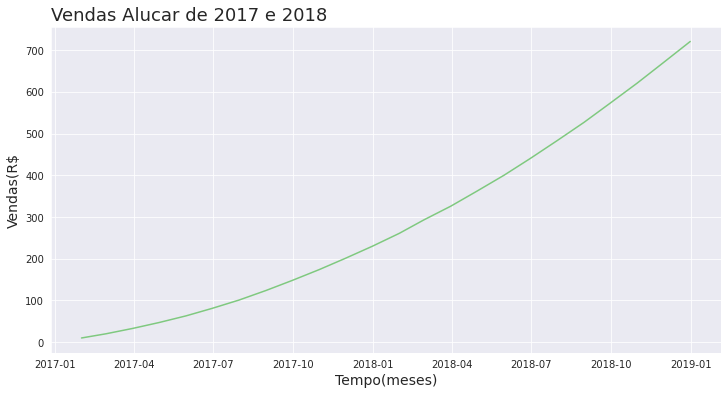

In [25]:
#melhorando a aparência do gráfico
sns.set_palette('Accent') #cores
sns.set_style('darkgrid') #estilo das linhas de grade
#atribuir o gráfico a uma variável - tira as informações do objeto da visualização além de facilitar a customização
ax = sns.lineplot(x='mes', y='vendas', data = alucar) #define o tipo do gráfico e das variáveis
ax.figure.set_size_inches(12,6) #configura o tamanho
ax.set_title('Vendas Alucar de 2017 e 2018',loc='left', fontsize=18) #configura o título
ax.set_xlabel('Tempo(meses)', fontsize=14) #configura o rótulo do eixo X
ax.set_ylabel('Vendas(R$', fontsize=14) # configura o rótulo do eixo Y
ax=ax

#### Aprendizado da aula 01

Carregamos um arquivo csv com as vendas da Alucar de 2017 e 2018

Examinamos o arquivo através de funções do pandas, para descobrir a quantidade de linhas e colunas presentes com o comando alucar.shape

Verificamos se havia dados nulos com o comando alucar.isna().sum().sum()

Alteramos o tipo do mês de object para datetime com o comando alucar['mes'] = pd.to_datetime(alucar['mes'])

Importamos as bibliotecas necessárias para gerar um gráfico da vendas, porém ao plotar, o gráfico e as labels não estavam num tamanho adequado e sem um título

Aperfeiçoamos o gráfico incluindo uma nova palette de cor, incluindo título e labels com tamanho adequado descrevendo melhor do que se trata nosso gráfico

##Aula 02 - Decomposição e Autocorrelação

In [26]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [27]:
#criando uma nova variável para verificar o aumento de vendas de um mês para o outro
alucar['aumento'] = alucar['vendas'].diff() #função já faz essa diferença
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


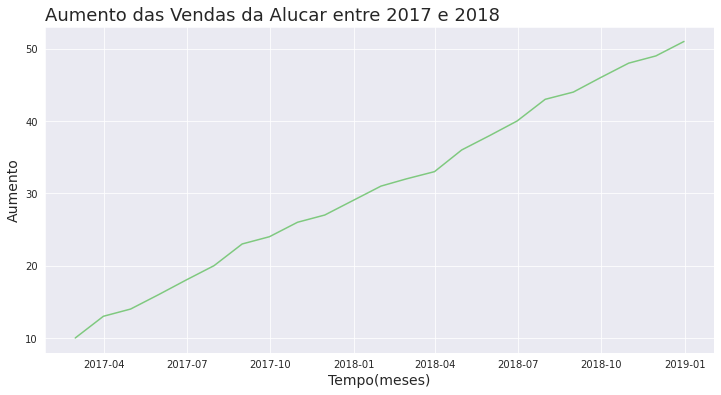

In [29]:
#plotando o gráfico do aumento
sns.set_palette('Accent') #cores
sns.set_style('darkgrid') #estilo das linhas de grade
#atribuir o gráfico a uma variável - tira as informações do objeto da visualização além de facilitar a customização
ax = sns.lineplot(x='mes', y='aumento', data = alucar) #define o tipo do gráfico e das variáveis
ax.figure.set_size_inches(12,6) #configura o tamanho
ax.set_title('Aumento das Vendas da Alucar entre 2017 e 2018',loc='left', fontsize=18) #configura o título
ax.set_xlabel('Tempo(meses)', fontsize=14) #configura o rótulo do eixo X
ax.set_ylabel('Aumento', fontsize=14) # configura o rótulo do eixo Y
ax=ax

In [0]:
#criando uma função para gerar este gráfico
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent') #cores
  sns.set_style('darkgrid') #estilo das linhas de grade
  #atribuir o gráfico a uma variável - tira as informações do objeto da visualização além de facilitar a customização
  ax = sns.lineplot(x=x, y=y, data = dataset) #define o tipo do gráfico e das variáveis
  ax.figure.set_size_inches(12,6) #configura o tamanho
  ax.set_title(titulo,loc='left', fontsize=18) #configura o título
  ax.set_xlabel(labelx, fontsize=14) #configura o rótulo do eixo X
  ax.set_ylabel(labely, fontsize=14) # configura o rótulo do eixo Y
  ax=ax

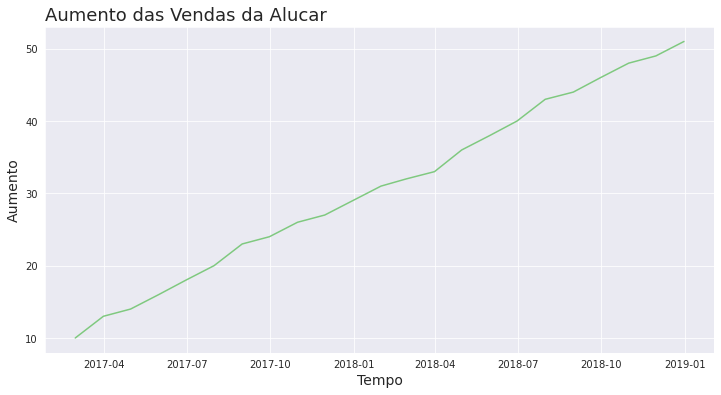

In [32]:
plotar('Aumento das Vendas da Alucar', 'Tempo', 'Aumento',
       'mes', 'aumento', alucar)

In [33]:
#verificar a aceleração do crescimento - nova decomposição do dataset
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


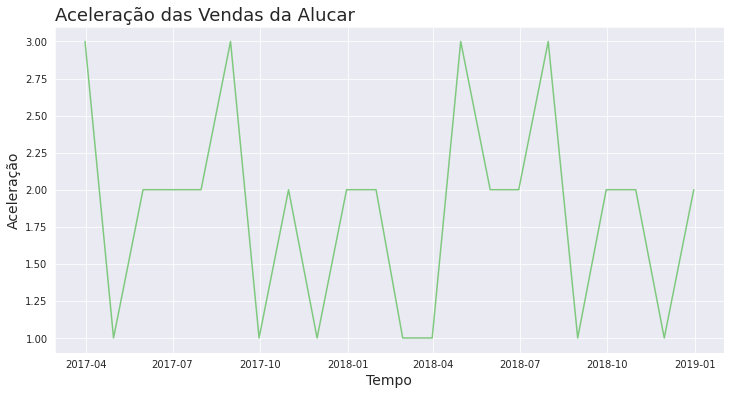

In [34]:
plotar('Aceleração das Vendas da Alucar', 'Tempo', 'Aceleração', 'mes', 'aceleracao',alucar)

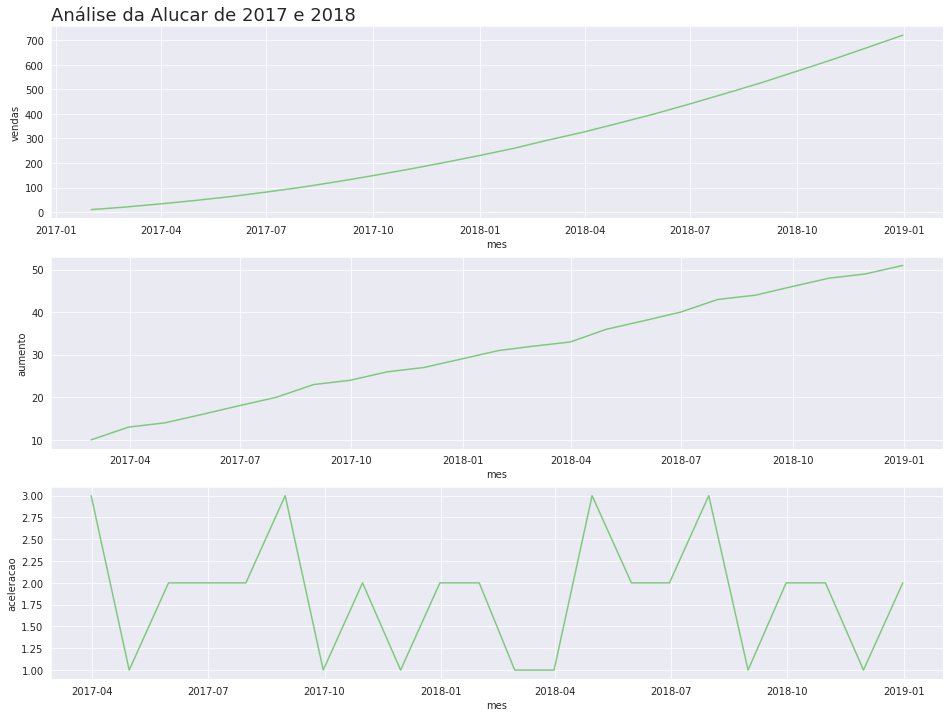

In [37]:
#juntando os gráficos
#criando um grid
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1) #3 linhas, um gráfico por linha
ax.set_title('Análise da Alucar de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data = alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data = alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data = alucar)
ax=ax



In [0]:
#criando uma função de plot comparativo
def plot_comparacao(x, y1, y2,y3, dataset,titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1) #3 linhas, um gráfico por linha
  ax.set_title(titulo, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data = dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data = dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data = dataset)
  ax=ax

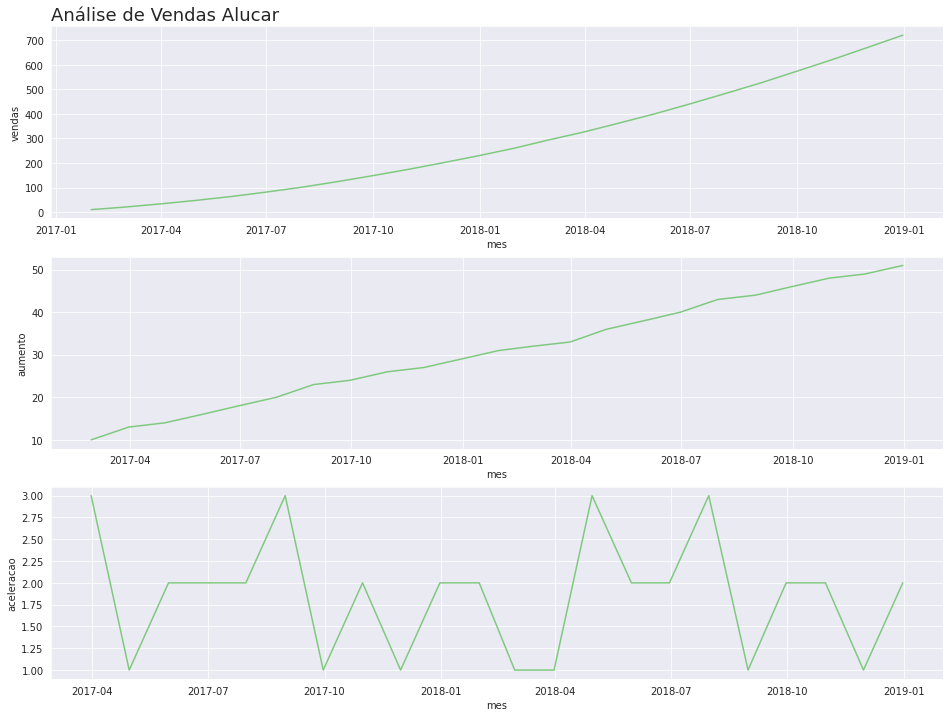

In [39]:
#criando o plot usando a funcão
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise de Vendas Alucar')

### Autocorrelações

In [0]:
### Verificando autocorrelações
from pandas.plotting import autocorrelation_plot

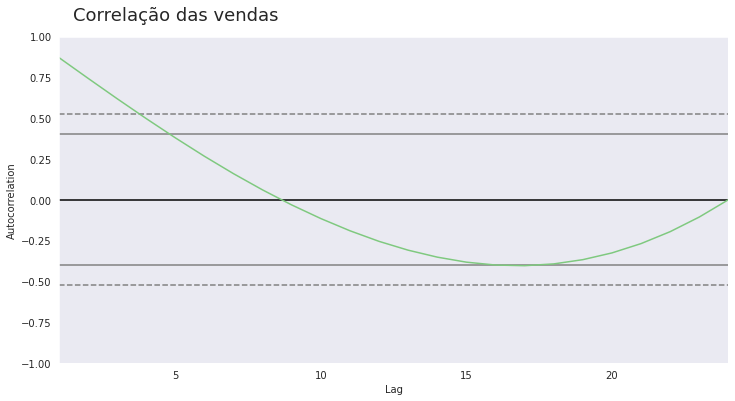

In [45]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

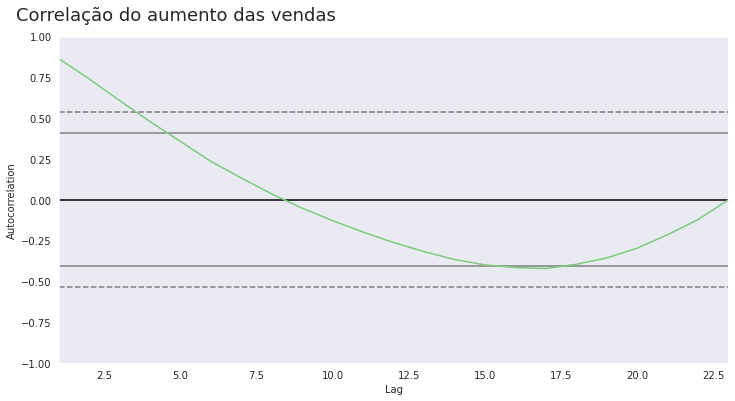

In [49]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

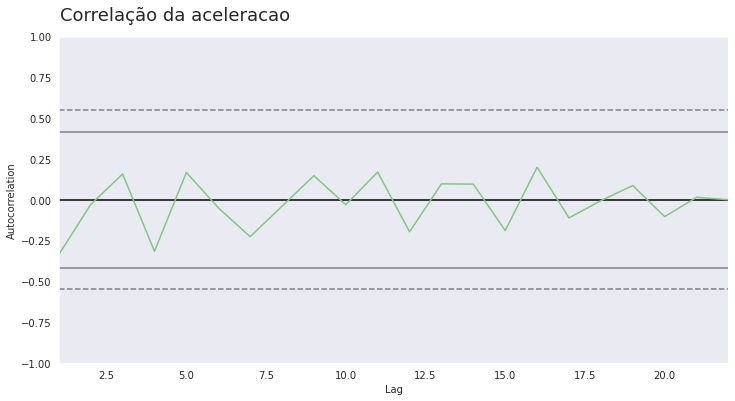

In [51]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleracao', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

#### Aprendizados da aula 02

Aplicamos a técnica de Decomposição de uma time series, para mensurar o crescimento mês a mês

Utilizamos a função diff() para decomposição das vendas para criar o aumento, e do aumento para descobrir a aceleração

Executamos a função de Autocorrelação para descobrir o nível de correlação das vendas, do aumento e da aceleração

Criamos uma função chamada plotar() e plot_comparacao() para geração de gráficos padronizados, evitando código duplicado

## Aula 03 -  Importância da decomposição e sazonalidade

### Alucar - Analisando assinantes da Newsletter

In [54]:
assinantes = pd.read_csv('/content/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [55]:
assinantes.shape

(24, 2)

In [56]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [58]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [59]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes.head()

,mes,assinantes,aumento
0,2017-01-31,0,NaN
1,2017-02-28,10,10.0
2,2017-03-31,21,11.0
3,2017-04-30,34,13.0
4,2017-05-31,49,15.0


In [61]:
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


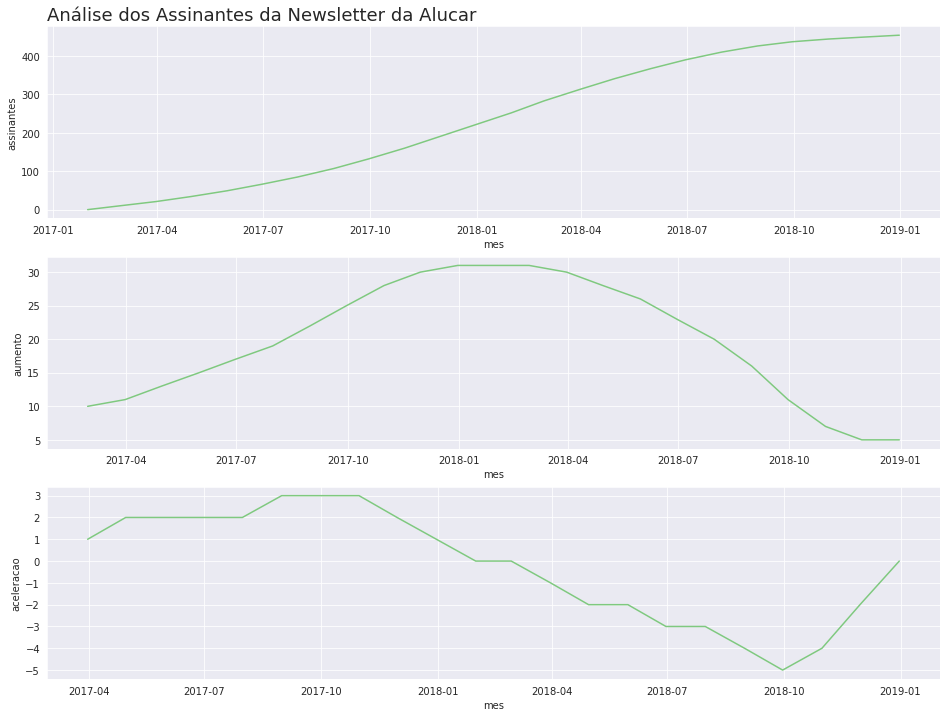

In [62]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise dos Assinantes da Newsletter da Alucar')

### Analisando os dados da Chocolura

In [63]:
chocolura = pd.read_csv('/content/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [65]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [0]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [69]:
print('quantidade de linhas:', chocolura.shape)
print('quantidade de dados nulos:', chocolura.isna().sum().sum())

quantidade de linhas: (24, 2)
quantidade de dados nulos: 0


In [0]:
chocolura['aumento'] = chocolura['vendas'].diff()

In [0]:
chocolura['aceleracao'] = chocolura['aumento'].diff()

In [72]:
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


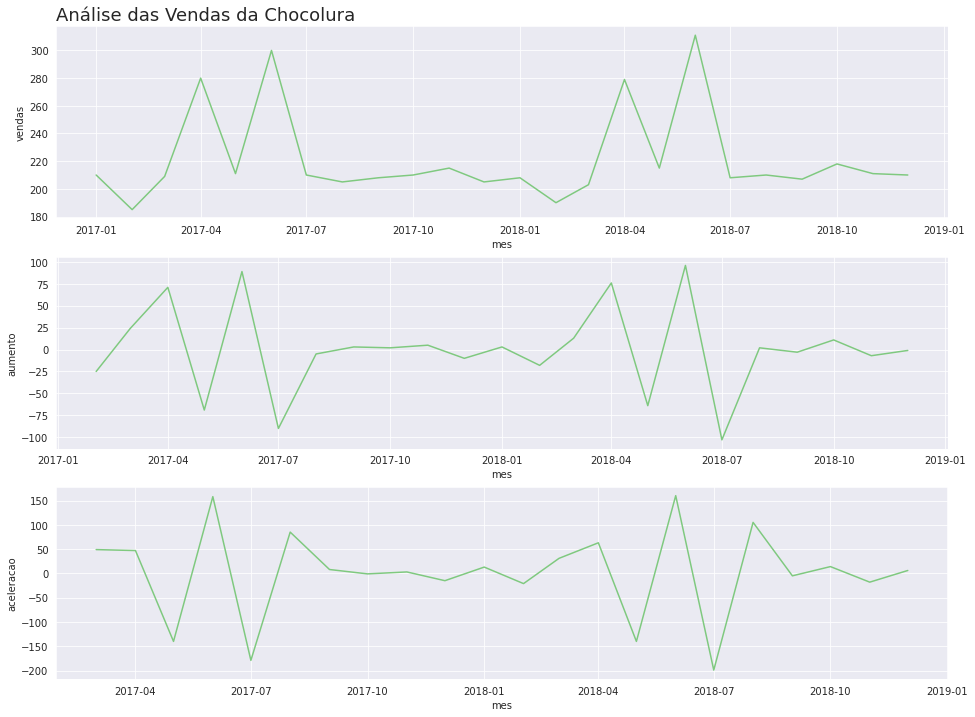

In [73]:
#aqui se vê bem a sazonalidade
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise das Vendas da Chocolura')

### Chocolura - Vendas diárias (outubro e novembro)

In [112]:
vendas_por_dia = pd.read_csv('/content/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [113]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [114]:
vendas_por_dia.shape

(61, 2)

In [100]:
vendas_por_dia.isna().sum().sum()

0

In [115]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [116]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


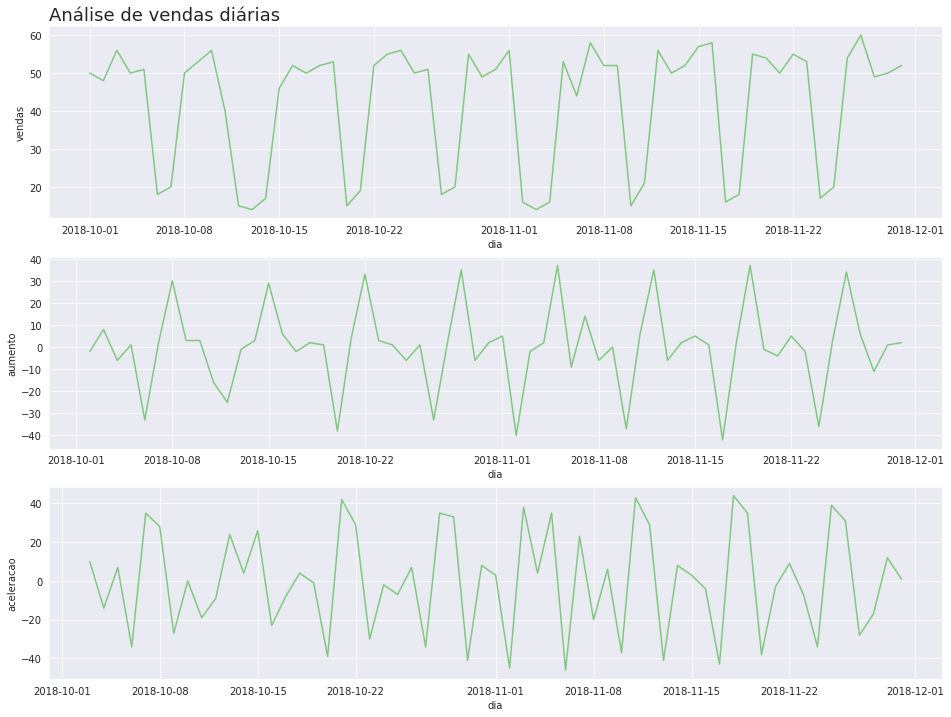

In [117]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas diárias')

#### Analisando a sazonalidade

In [0]:
#criar uma coluna nova chamada dia da semana
#na aula usa a função weekday_name mas ela foi removida a partir da versão 0.23.
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [119]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [120]:
#alterando para português os dias da semana
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [0]:

#traduzindo
dias_traduzidos = {'Monday':'Segunda', 'Tuesday': 'Terca', 'Wednesday': 'Quarta',
                    'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday': 'Sabado','Sunday': 'Domingo'}

In [122]:
#substituindo
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terca
9,2018-10-10,56,3.0,0.0,Quarta


### Agrupando os dias

In [123]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [124]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


##### Aprendizados da Aula 03:

Vimos a importância da técnica de Decomposição na análise dos assinantes da newsletter da Alucar

Analisamos as vendas da Chocolura e descobrimos um padrão repetitivo no movimento das vendas dentro de um período de tempo fixo, na qual é chamado de Sazonalidade

Examinamos as vendas de uma determinada loja da Chocolura nos meses de Outubro e Novembro de 2018, e descobrimos que também havia uma sazonalidade

Investigamos o que causava a sazonalidade desta loja

## Aula 04 - Normalização e statsmodels

### Correlação das Vendas diárias

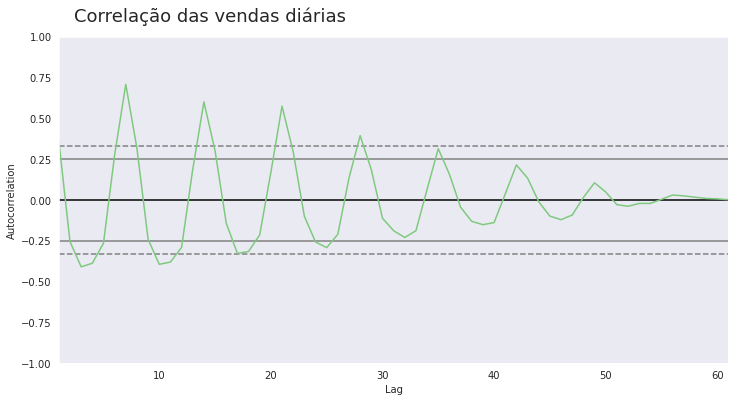

In [125]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

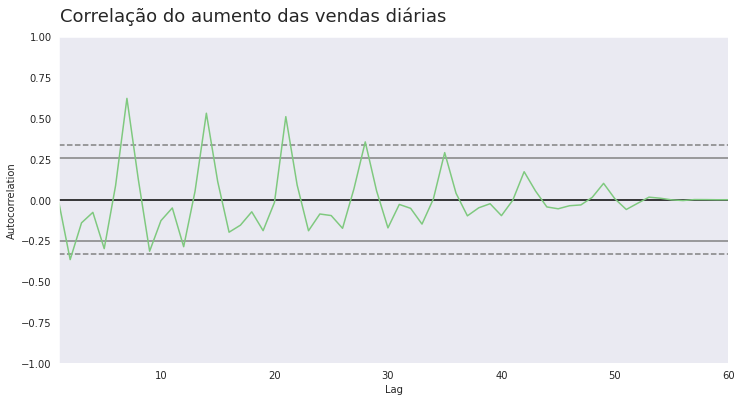

In [127]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

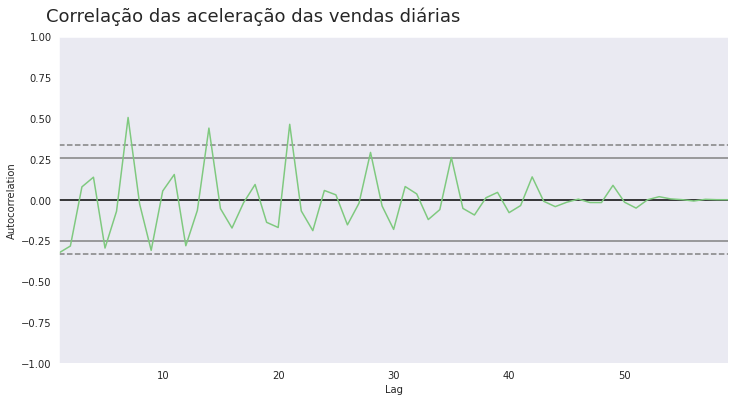

In [130]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das aceleração das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

### Analisando os dados da Cafelura

In [132]:
cafelura = pd.read_csv('/content/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [133]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [134]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [135]:
cafelura.shape

(24, 2)

In [136]:
cafelura.isna().sum().sum()

0

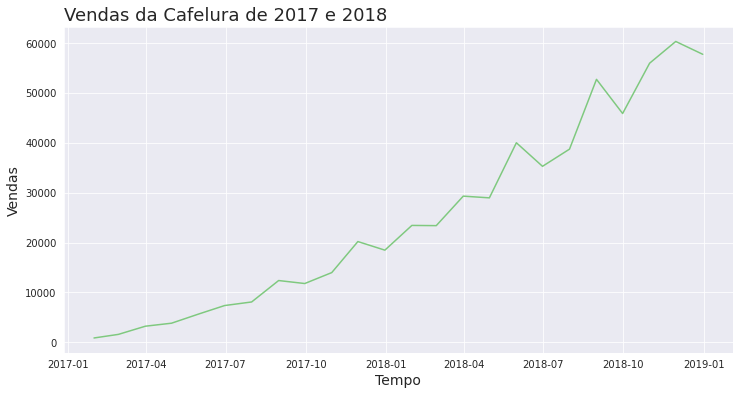

In [137]:
#checando a tendência de vendas
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [139]:
#normalizando os dados (dias da semana, dias do mês, etc)
#carregando o df de dias da semana
quantidade_de_dias_de_final_de_semana = pd.read_csv('/content/dias_final_de_semana.csv')
#visualizar o df
quantidade_de_dias_de_final_de_semana.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [140]:
#trazer apenas os valores
quantidade_de_dias_de_final_de_semana['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [0]:
#dividir as vendas pela quantidade de dias de fim de semana
#como as vendas são mensais, ele ajuda a diluir a sazonalidade semanal
cafelura['vendas_normalizadas'] = cafelura['vendas']/(quantidade_de_dias_de_final_de_semana['quantidade_de_dias'].values)

In [151]:
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


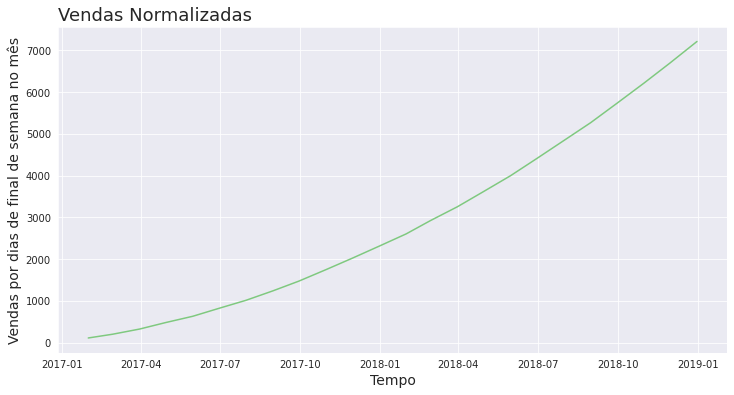

In [152]:
plotar('Vendas Normalizadas', 'Tempo', 'Vendas por dias de final de semana no mês', 'mes', 'vendas_normalizadas', cafelura)

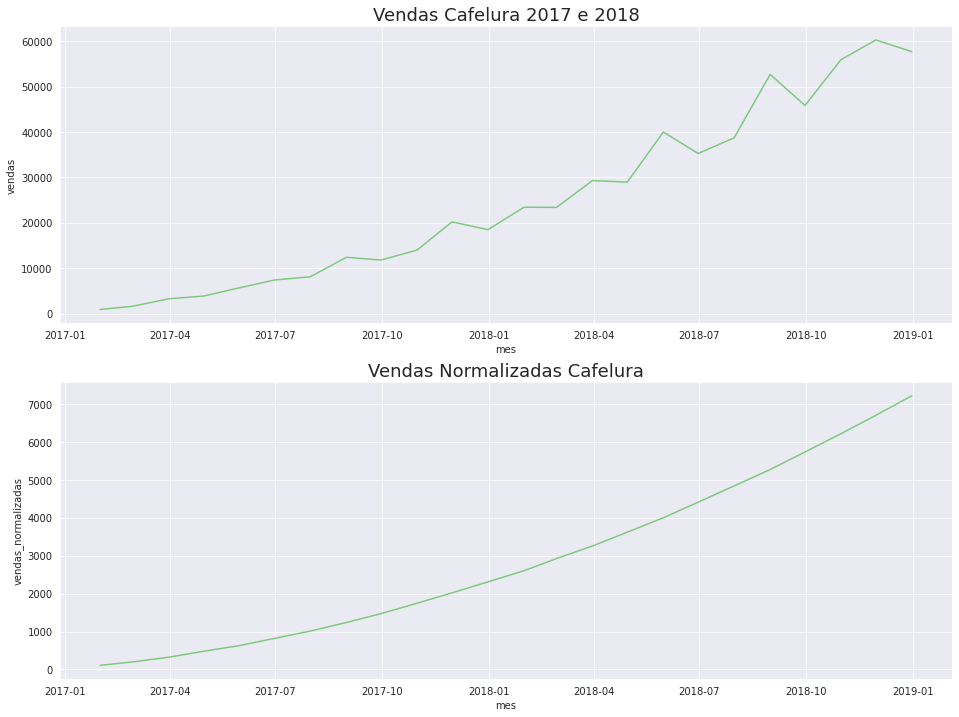

In [154]:
plt.figure(figsize=(16,12))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax = ax

#### Verificando tendências, sazonalidade e ruídos - Statsmodels

In [0]:
#importando a biblioteca
from statsmodels.tsa.seasonal import seasonal_decompose

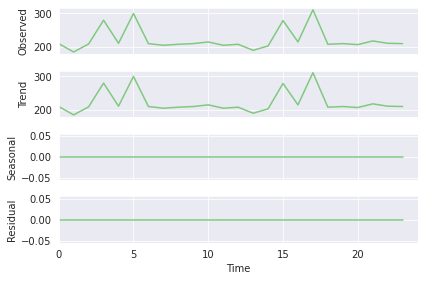

In [158]:
#precisamos passar uma lista para que ele funcione
resultado = seasonal_decompose([chocolura['vendas']], freq=1) #o número q queremos 
ax = resultado.plot()

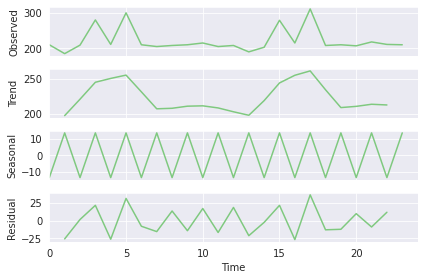

In [159]:
#mudando a frequencia
resultado = seasonal_decompose([chocolura['vendas']], freq=2) #o número q queremos 
ax = resultado.plot()

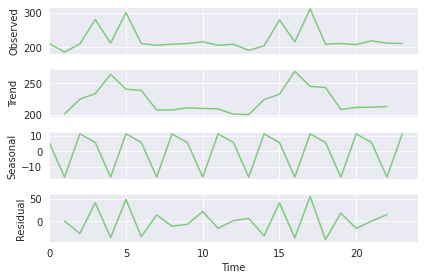

In [160]:
#aumentando a frequencia de novo
resultado = seasonal_decompose([chocolura['vendas']], freq=3) #o número q queremos 
ax = resultado.plot()

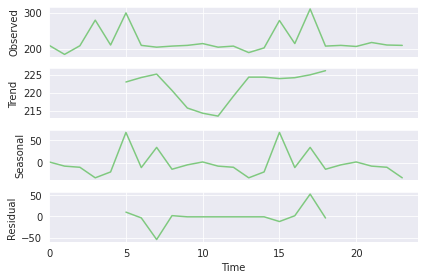

In [161]:
#mudando de verdade a frequencia
resultado = seasonal_decompose([chocolura['vendas']], freq=10) #o número q queremos 
ax = resultado.plot()

In [0]:
#deixando bonitinho
#primeiro voltando pra frequencia 3
resultado = seasonal_decompose([chocolura['vendas']], freq=3) #o número q queremos 
#armazenando as variáveis Observed, Trend, Seasonal e Residual
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [163]:
data = ({
    'observacao' : observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508


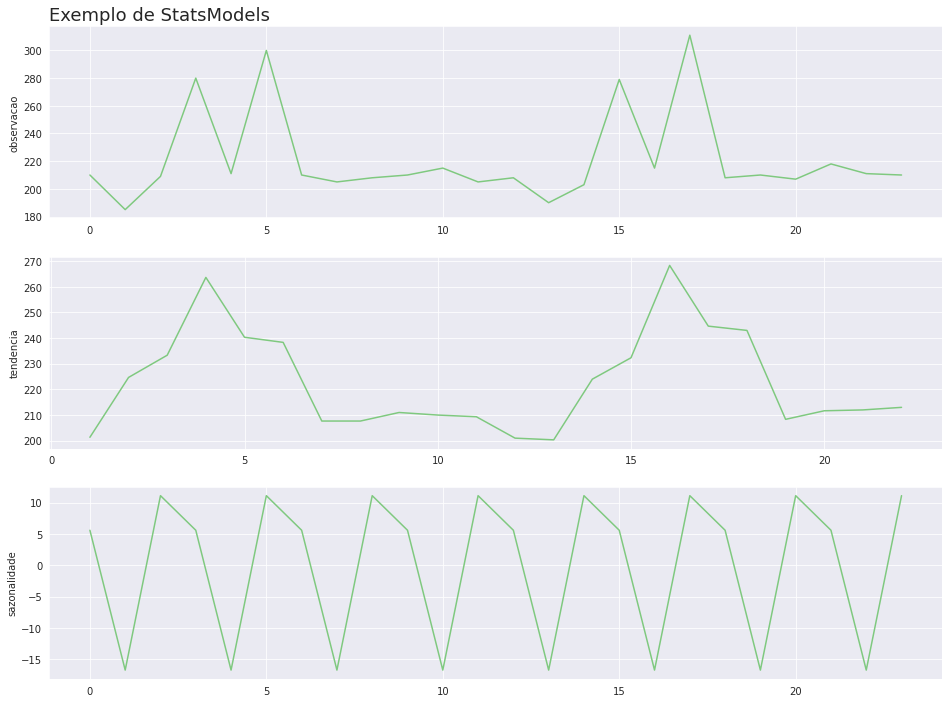

In [166]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de StatsModels')

##### Aprendizados da Aula 04

Aplicamos a função de Autocorrelação nas vendas, no aumento e na aceleração das vendas diárias e vimos que havia uma correlação entre elas

Executamos uma técnica de normalização de time series para minimizar as frequências pela quantidade de dias de finais de semana de cada mês

Analisamos uma time series importando da biblioteca statsmodels.tsa.seasonal a função seasonal_decompose, que nos mostra o que é a nossa observação, tendência, sazonalidade e ruído de uma só vez

## Aula 05 -  Ruídos e média móvel

### Analisando os dados da Alucel

In [168]:
alucel = pd.read_csv('/content/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [169]:
alucel.shape

(61, 2)

In [170]:
alucel.isna().sum().sum()

0

In [171]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [172]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [0]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()

In [174]:
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


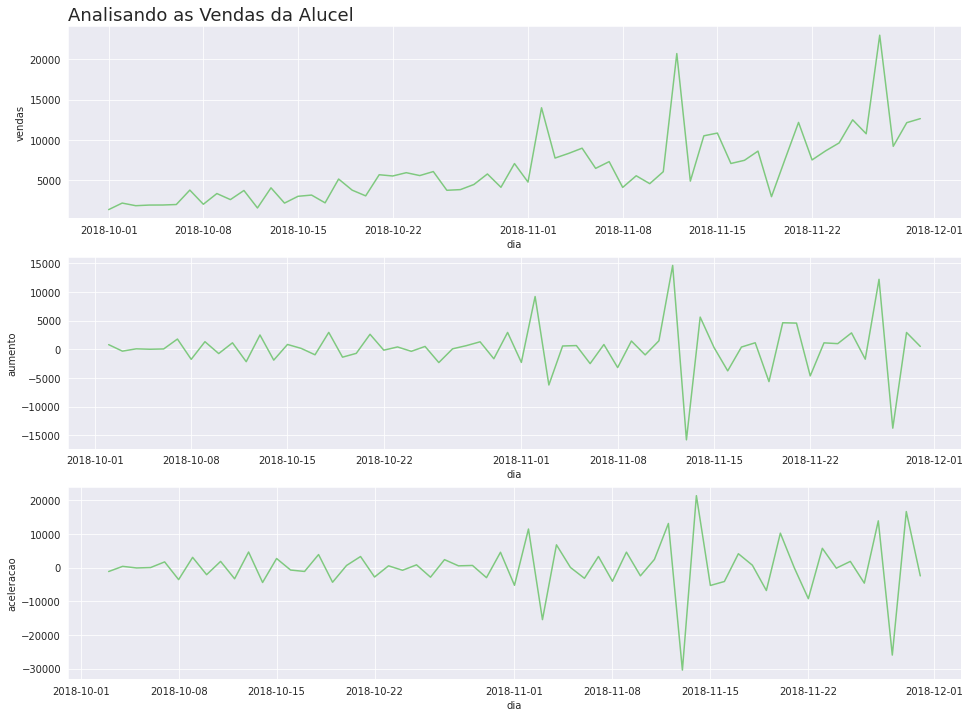

In [175]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Analisando as Vendas da Alucel')

### Média Móvel

Notamos muitos ruidos no gráfico anterior. Vamos agora aplicar técnicas de normalização nos dados recebidos para minimizar esses ruídos.
Neste caso vamos usar a técnica da média móvel

In [0]:
#criando uma nova variável no pd - função rolling, usando como especificação 7 pontos (dias) e aplicando a média
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [177]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


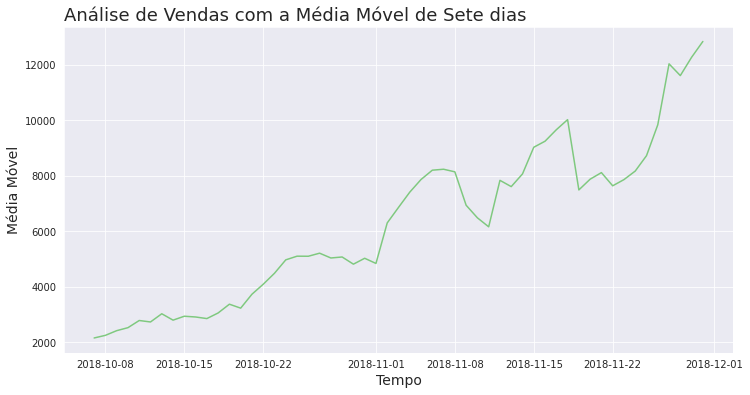

In [178]:
#vamos plotar a média móvel
plotar('Análise de Vendas com a Média Móvel de Sete dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

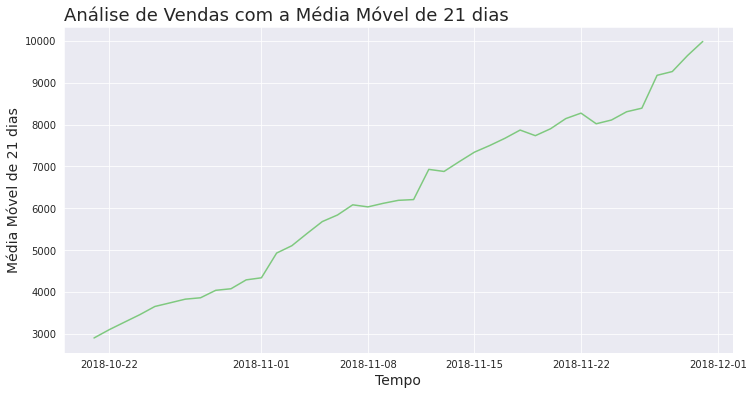

In [179]:
#criando uma nova média movel por 21 dias
#cuidado pois se o rolling for muito grande, podemos perder informação e a essência dos dados
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()
plotar('Análise de Vendas com a Média Móvel de 21 dias', 'Tempo', 'Média Móvel de 21 dias', 'dia', 'media_movel_21', alucel)


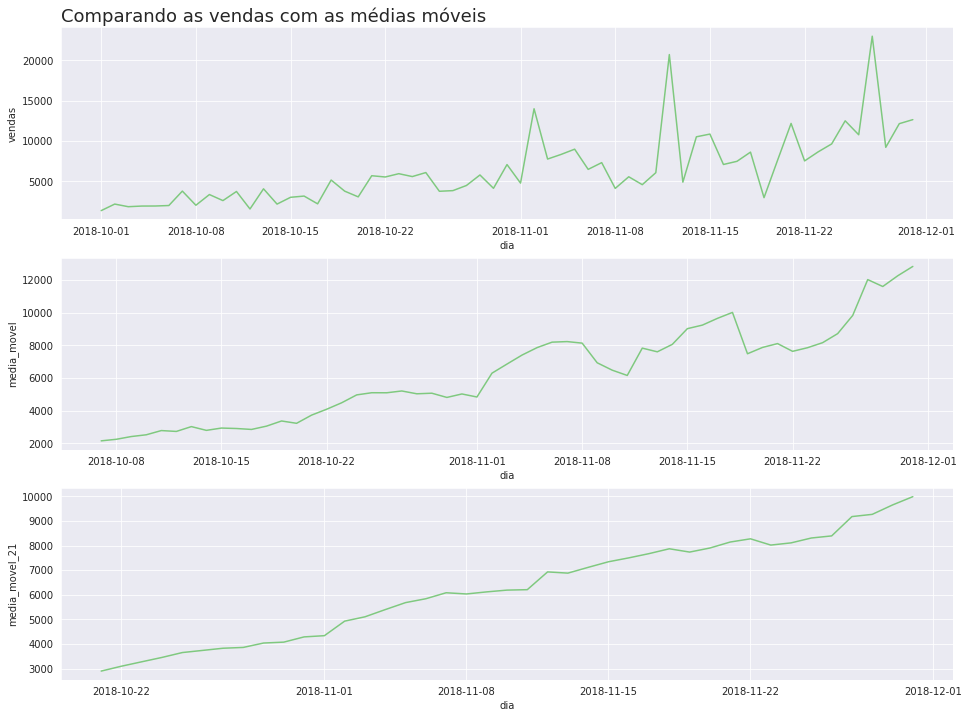

In [181]:
#plotando o comparativo
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as vendas com as médias móveis')

Alguns conceitos:
- A tendência refere-se ao movimento de uma série para valores relativamente mais altos ou mais baixos durante um longo período de tempo
- O ruído ou irregularidade é alguma forma de variação aleatória dentro de uma série temporal
- A sazonalidade refere-se a um padrão repetitivo dentro de um período de tempo fixo
- A média móvel pode ser utilizada para reduzir o ruído
